# Case Housing Prices

## Etapas - 1a aula

- Planejar a Inspeção Inicial e Limpeza de Dados
- Planejar a Análise Exploratória
- Realizar a Inspeção Inicial e Limpeza dos Dados
- Realizar a EDA

# Apresentação do Case

<br>
<img src="https://thumbor.forbes.com/thumbor/fit-in/1200x0/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F1139584112%2F0x0.jpg" width="950" />
<br>

No nosso exemplo vamos modelar uma regressão para explicar os preços das casas nos EUA.

    
Features:
- **price** - The last price the house was sold for
- **num_bed** - The number of bedrooms
- **num_bath** - The number of bathrooms (fractions mean the house has a toilet-only or shower/bathtub-only bathroom)
- **size_house** (includes basement) - The size of the house
- **size_lot** - The size of the lot
- **num_floors** - The number of floors
- **is_waterfront** - Whether or not the house is a waterfront house (0 means it is not a waterfront house whereas 1 means that it is a waterfront house)
- **condition** - How worn out the house is. Ranges from 1 (needs repairs all over the place) to 5 (the house is very well maintained)
- **size_basement** - The size of the basement
- **year_built** - The year the house was built
- **renovation_date** - The year the house was renovated for the last time. 0 means the house has never been renovated
- **zip** - The zip code
- **latitude** - Latitude
- **longitude** - Longitude
- **avg_size_neighbor_houses** - The average house size of the neighbors
- **avg_size_neighbor_lot** - The average lot size of the neighbors

O dataset foi simplificado para a aula (algumas features foram excluídas). Dados originais disponíveis no Kaggle [clicando aqui](https://www.kaggle.com/harlfoxem/housesalesprediction)

--------------

Daremos algumas dicas e sugestões do que inspecionar/analisar, mas podem pensar em em outras questões. No início da próxima aula, apresentaremos a solução proposta para essa primeira etapa.
Na etapa de planejamento, tentem se lembrar de funções, bibliotecas que vocês podem utilizar para realizar essas etapas;

# Inspeção Inicial

In [ ]:
#Ler todas as bibliotecas aqui
# Ler todas as bibliotecas aqui
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import scipy
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import ttest_ind

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Ler os dados aqui
#path = 'house_pricing.csv'
path = '/content/drive/MyDrive/Automated_ML_and_Deploy/Regressao/Aula33_20220513_Modelagem_Estatística_I/house_pricing.csv'
df_houses = pd.read_csv(path, sep=',')
df_houses.head()

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,239000,3,1.0,1510,15022,1.0,0,3,0,1962,0,98003,47.330433,-122.303609,1510,12970
1,1260000,3,3.5,3220,3960,2.0,0,3,460,1991,0,98116,47.590933,-122.384230,3080,4444
2,414500,3,1.0,1050,6002,1.0,0,3,210,1941,0,98115,47.698761,-122.316010,1180,6003
3,252500,3,2.5,1780,7192,1.0,0,4,530,1974,0,98031,47.409319,-122.173484,1870,8500
4,389000,3,1.0,1330,3740,1.5,0,3,0,1903,0,98118,47.550242,-122.274232,1330,5053


- Quantidade de linhas, quantidade de colunas
- Titulo das colunas e o que elas significam (comparar com a descrição inicial. Elas fazem sentido?)
- Tipo dos dados, não apenas se são numéricas ou texto. O que elas são de fato. São numéricas mas deveriam ser categorias ou datetime?
- Visão geral dos valores que as variáveis podem assumir (análise de inconsistências nos dados)
- Duplicatas (linhas e colunas)?
- Missing Values

Codificar o planejamento e Registrar o que foi encontrado em forma de texto, como se estivesse fazendo um relatório sobre seus achados.

In [ ]:
df_houses.shape

(1845, 16)

In [ ]:
df_houses.dtypes

price                         int64
num_bed                       int64
num_bath                    float64
size_house                    int64
size_lot                      int64
num_floors                  float64
is_waterfront                 int64
condition                     int64
size_basement                 int64
year_built                    int64
renovation_date               int64
zip                           int64
latitude                    float64
longitude                   float64
avg_size_neighbor_houses      int64
avg_size_neighbor_lot         int64
dtype: object

* price - Ainda que esperássemos um tipo float, o tipo int também cabe nessa variável.
* num_bed - O tipo inteiro é apropriado
* num_bath - Inicialmente, parece estranho, mas essa variável estar como float reflete algo relacionado ao negócio (forma como os banheiros são vistos no USA)

In [ ]:
df_houses.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1845.0,557127.039024,403208.183409,81000.000000,325000.000000,457000.000000,665000.000000,7.062500e+06
num_bed,1845.0,3.379946,0.939221,0.000000,3.000000,3.000000,4.000000,9.000000e+00
num_bath,1845.0,2.140108,0.785074,0.000000,1.750000,2.250000,2.500000,6.750000e+00
size_house,1845.0,2128.444986,955.754345,410.000000,1440.000000,1950.000000,2620.000000,1.004000e+04
size_lot,1845.0,15642.503523,41323.934402,649.000000,5100.000000,7700.000000,11060.000000,1.024068e+06
num_floors,1845.0,1.518970,0.549520,1.000000,1.000000,1.500000,2.000000,3.500000e+00
is_waterfront,1845.0,0.014092,0.117903,0.000000,0.000000,0.000000,0.000000,1.000000e+00
condition,1845.0,3.382114,0.634172,1.000000,3.000000,3.000000,4.000000,5.000000e+00
size_basement,1845.0,290.643902,461.995804,0.000000,0.000000,0.000000,550.000000,4.820000e+03
year_built,1845.0,1971.820054,29.097993,1900.000000,1952.000000,1976.000000,1997.000000,2.015000e+03


In [ ]:
list_unique_check = ['is_waterfront', 'condition', 'zip']
for col in list_unique_check:
    unique_values = df_houses[col].unique()
    print(f'A coluna {col} possui {len(unique_values)} valores distintos, que são: {unique_values}')

A coluna is_waterfront possui 2 valores distintos, que são: [0 1]
A coluna condition possui 5 valores distintos, que são: [3 4 5 2 1]
A coluna zip possui 70 valores distintos, que são: [98003 98116 98115 98031 98118 98103 98023 98042 98112 98075 98117 98058
 98002 98146 98034 98038 98133 98125 98168 98004 98005 98056 98053 98029
 98119 98052 98028 98033 98030 98199 98001 98109 98072 98166 98155 98007
 98077 98027 98055 98006 98107 98188 98008 98126 98144 98011 98177 98136
 98032 98059 98070 98019 98198 98102 98065 98092 98022 98178 98106 98040
 98105 98010 98074 98122 98045 98039 98024 98108 98014 98148]


In [ ]:
# checando duplicadas nas linhas
print(f'Temos {df_houses.duplicated().sum()} linhas duplicadas')

Temos 0 linhas duplicadas


In [ ]:
# checando duplicadas nas colunas
print(f'Temos {df_houses.T.duplicated().sum()} colunas duplicadas')

Temos 0 colunas duplicadas


In [ ]:
# checando missing values
df_houses.isna().sum()

price                       0
num_bed                     0
num_bath                    0
size_house                  0
size_lot                    0
num_floors                  0
is_waterfront               0
condition                   0
size_basement               0
year_built                  0
renovation_date             0
zip                         0
latitude                    0
longitude                   0
avg_size_neighbor_houses    0
avg_size_neighbor_lot       0
dtype: int64

# Análise Exploratória de Dados (EDA)

Seria interessante se você:
- Estudasse as distribuições das variáveis (histogramas, boxplots, Quartis, Valor Máximo e Mínimo)
- Estudasse as relações entre as variáveis envolvidas (gráficos de dispersão, histogramas, boxplots, testes de correlação e associação, entre outros)
- Levantasse questionamentos sobre os problemas (levante hipóteses sobre os dados e tente respondê-las usando suas análises)

Detalhe: Antes de iniciar a análise exploratória, dividam os dados em treino e teste. 

In [ ]:
df_train_houses, df_test_houses = train_test_split(df_houses, train_size=0.7, random_state=123)

In [ ]:
print(df_train_houses.shape, df_test_houses.shape)

(1291, 16) (554, 16)


In [ ]:
df_test_houses.shape[0]/df_houses.shape[0]

0.3002710027100271

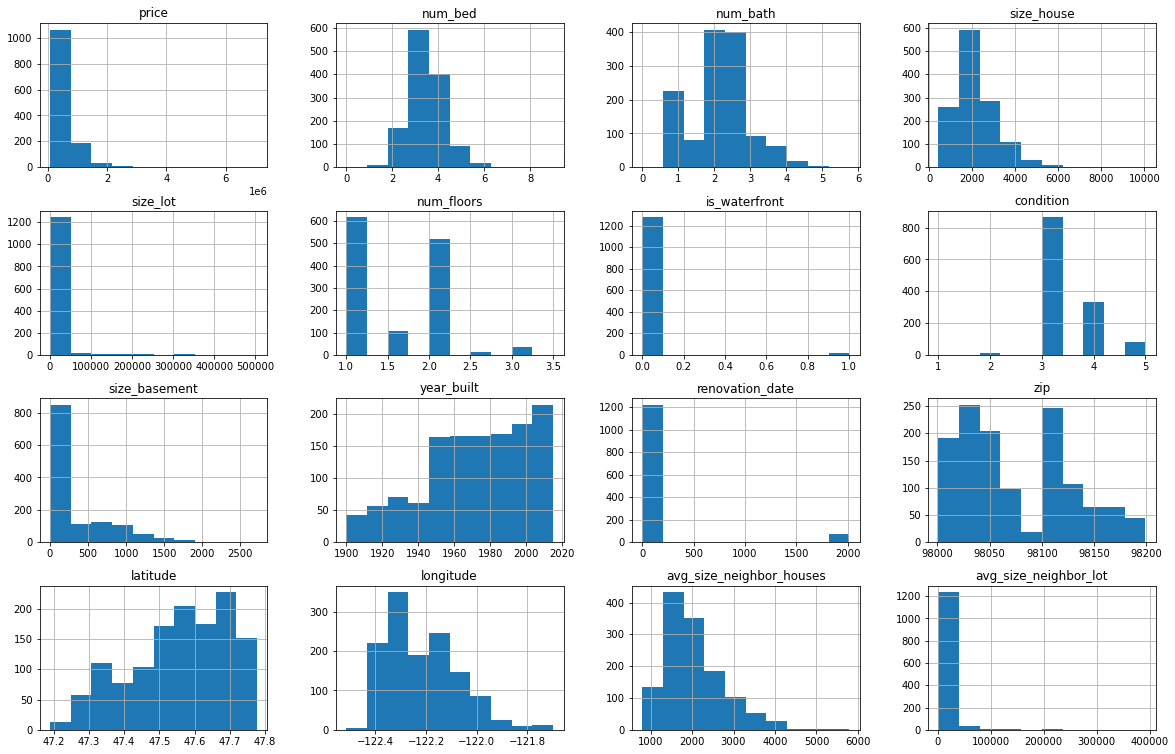

In [ ]:
# Estudo das distribuções das variáveis
df_train_houses
df_train_houses.hist(figsize=(20,13));

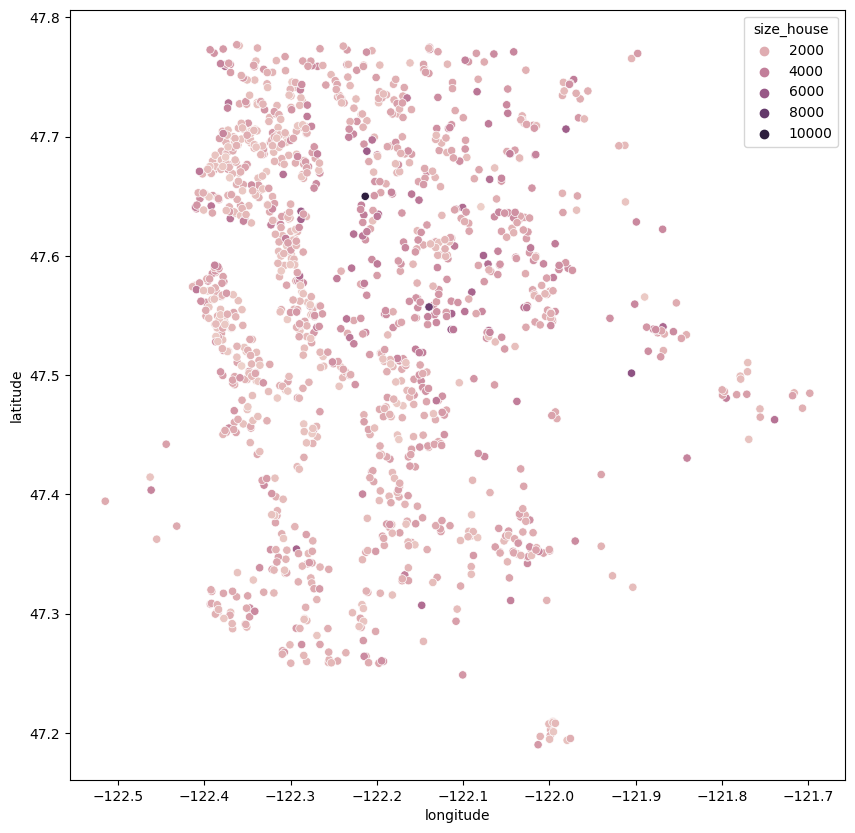

In [ ]:
# Hipotese: Há alguma relação entre a geografia e o tamanho das casas?
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=df_train_houses.size_house);
plt.show()

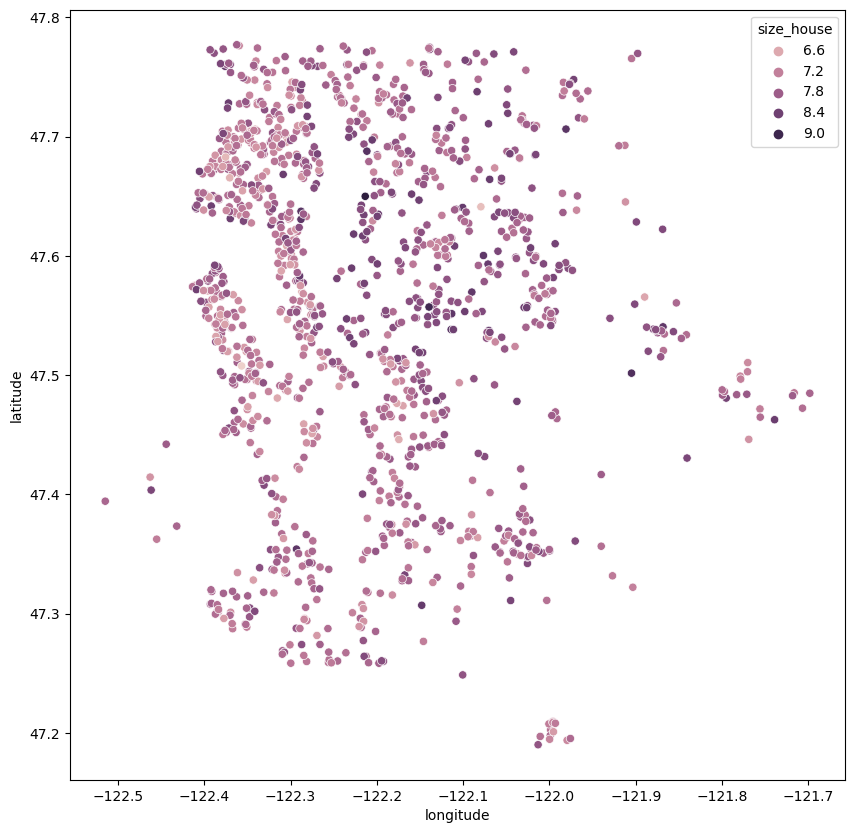

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=np.log(df_train_houses.size_house))
plt.show()

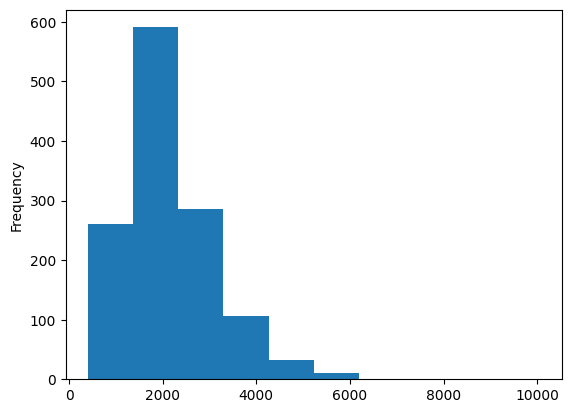

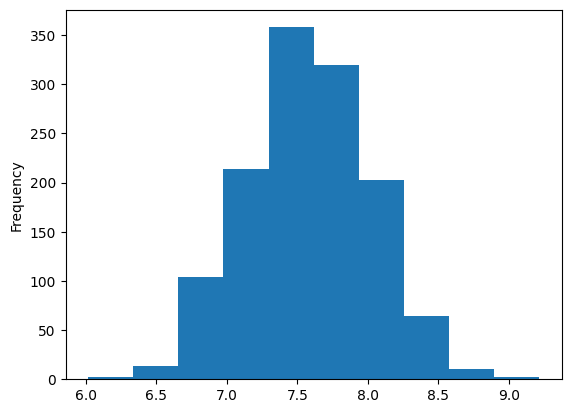

In [ ]:
df_train_houses.size_house.plot(kind='hist')
plt.show();
np.log(df_train_houses.size_house).plot(kind='hist');

# As casas maiores parecem estar mais localizadas ao centro/norte, coincidindo com a informação de tamanho.

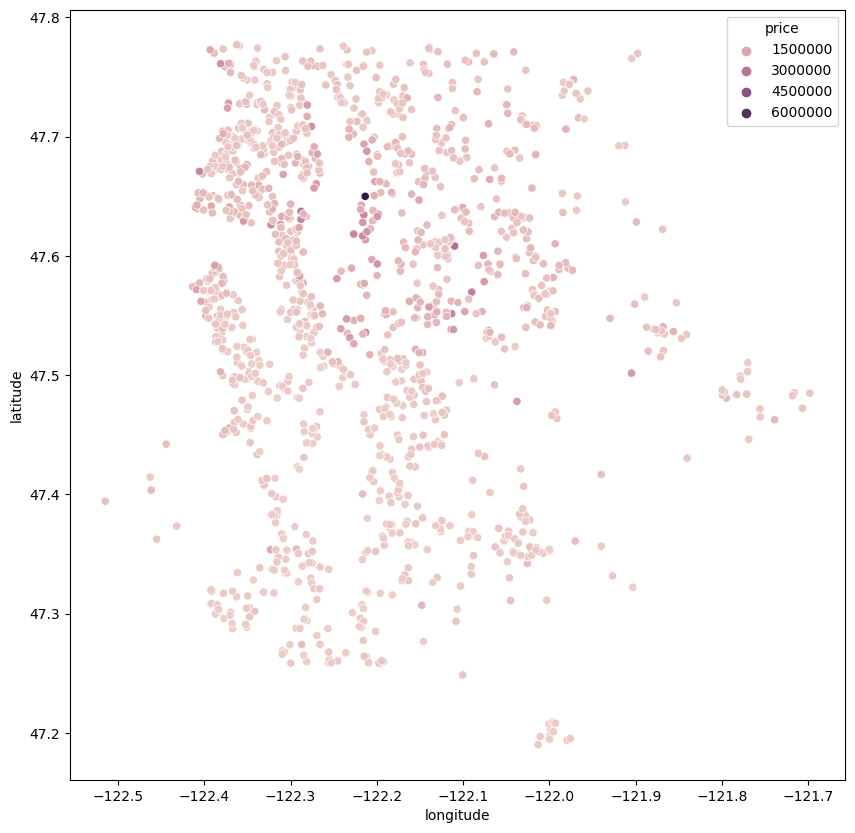

In [ ]:
# Hipotese: Há alguma relação entre a geografia e o preço das casas?
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=df_train_houses.price);
plt.show()

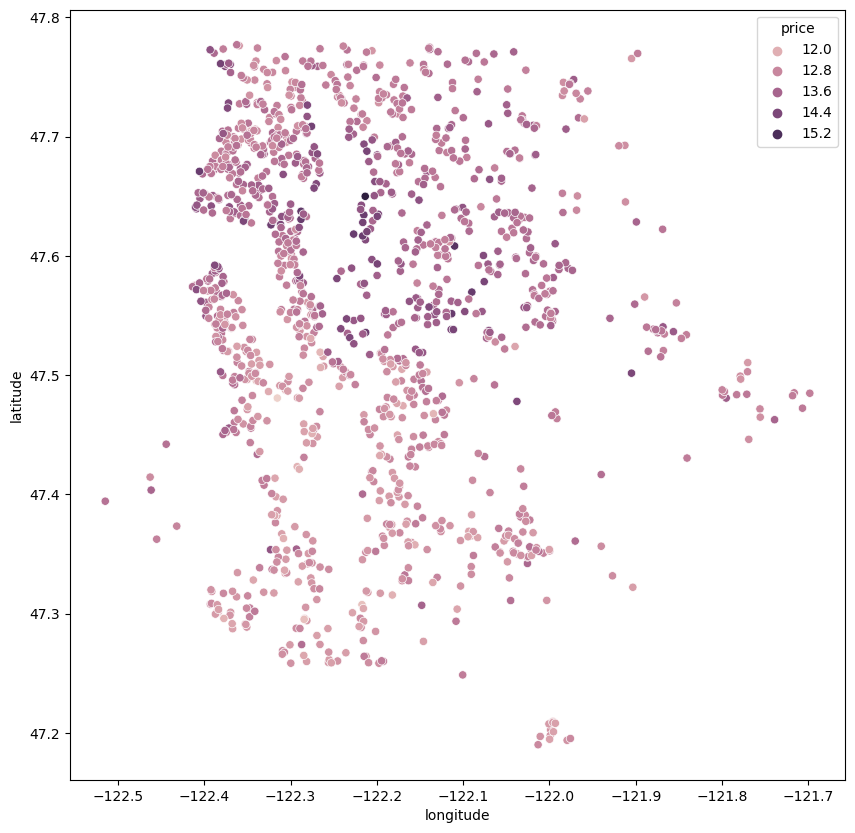

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=np.log(df_train_houses.price))
plt.show()

# As casas mais caras parecem estar mais localizadas ao centro/norte, coincidindo com a informação de tamanho.

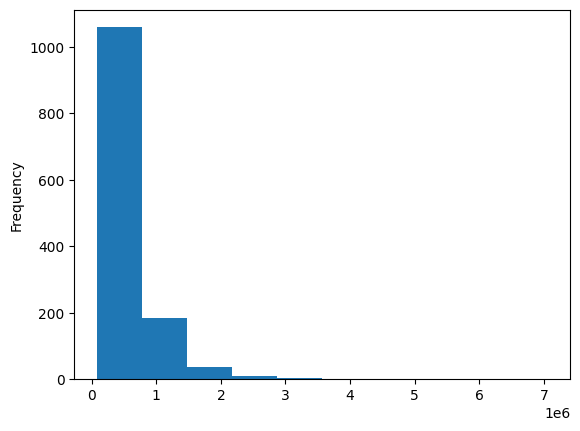

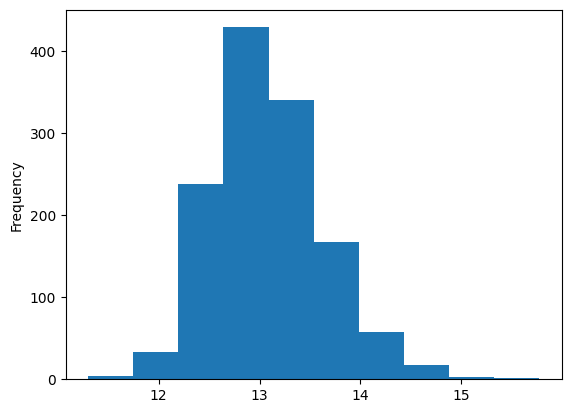

In [ ]:
df_train_houses.price.plot(kind='hist')
plt.show();
np.log(df_train_houses.price).plot(kind='hist');

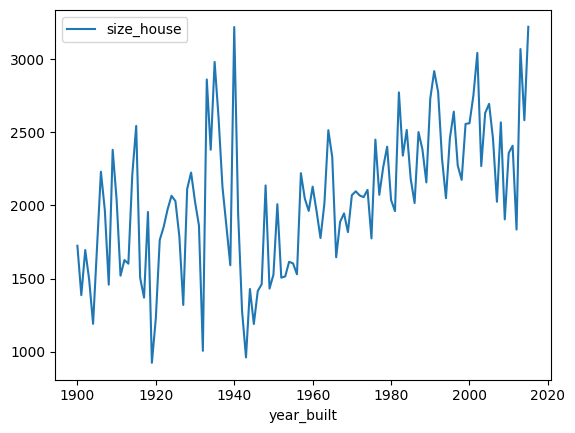

In [ ]:
# Hipotese: Casas mais velhas são maaiores e mais centrais
#df_train_houses.pivot_table(values='size_house', columns='year_built',aggfunc='mean')
#df_train_houses.pivot_table(values='size_house', columns='year_built',aggfunc='mean').T
df_train_houses.pivot_table(values='size_house', columns='year_built',aggfunc='mean').T.plot()
plt.show()

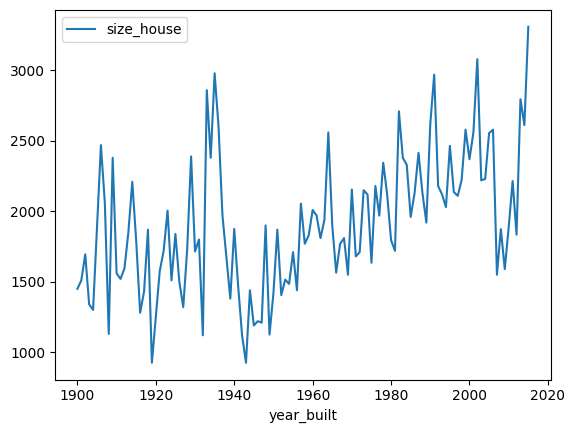

In [ ]:
df_train_houses.pivot_table(values='size_house', columns='year_built',aggfunc='median').T.plot()
plt.show()

Na verdade, as casas tem aumentado de tamanho ao longo dos anos.

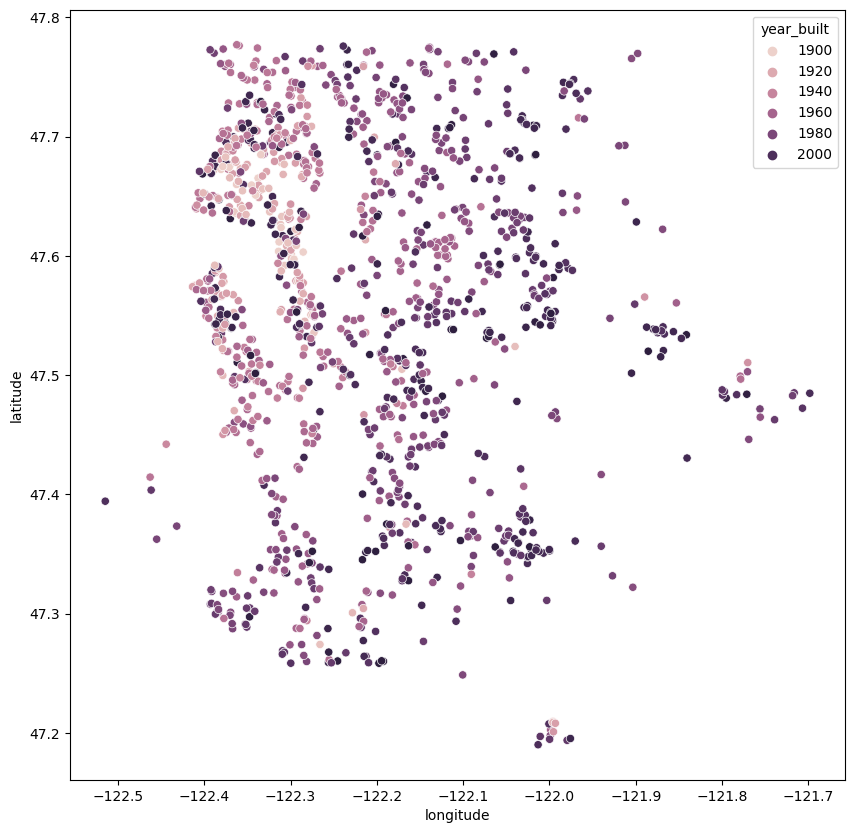

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=df_train_houses.year_built);
plt.show()

As casas mais antigas se concentram mais no canto superior esquerdo. É um indício de uma área mais antiga da cidade, a partir de onde a cidade cresceu;

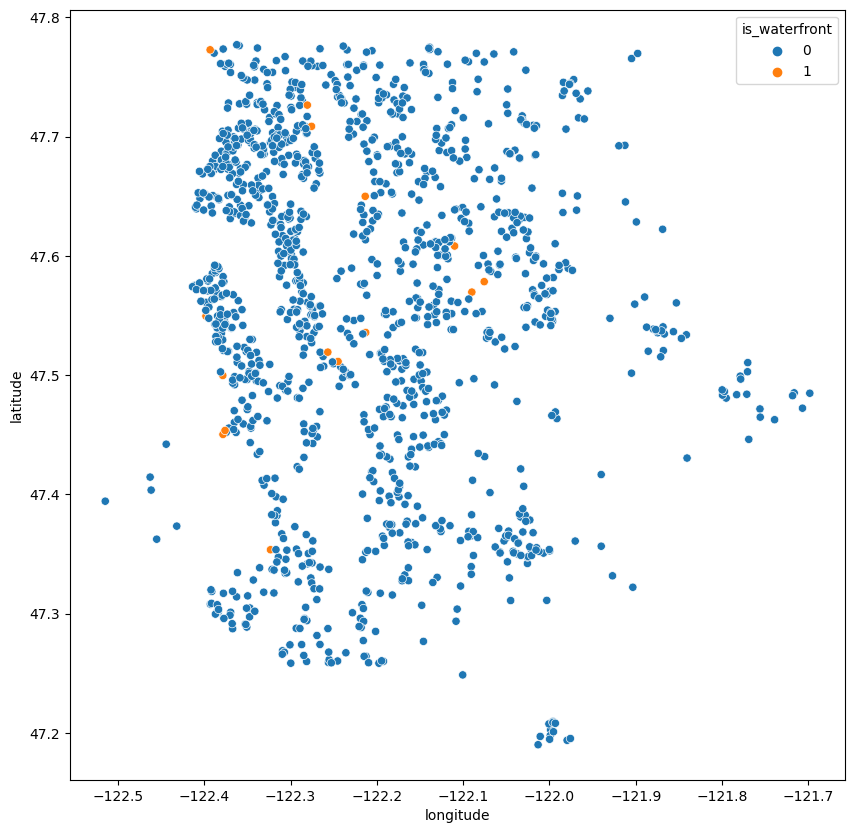

In [ ]:
# Hipotese: Casas waterfront são mais caras e mais afastadas
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_houses.longitude, y=df_train_houses.latitude, hue=df_train_houses.is_waterfront);
plt.show()

Esperávamos que as casas waterfront fossem mais afastadas, mas esse padrão não fica evidente. Pesquisando, descobrimos que casas waterfront são aquelas que possuem qualquer coisa de água na frente.  OU seja, não precisa ser de frente para praia, rio ou outra coisa necessariamente. É algo que ajuda na ornamentação da casa.

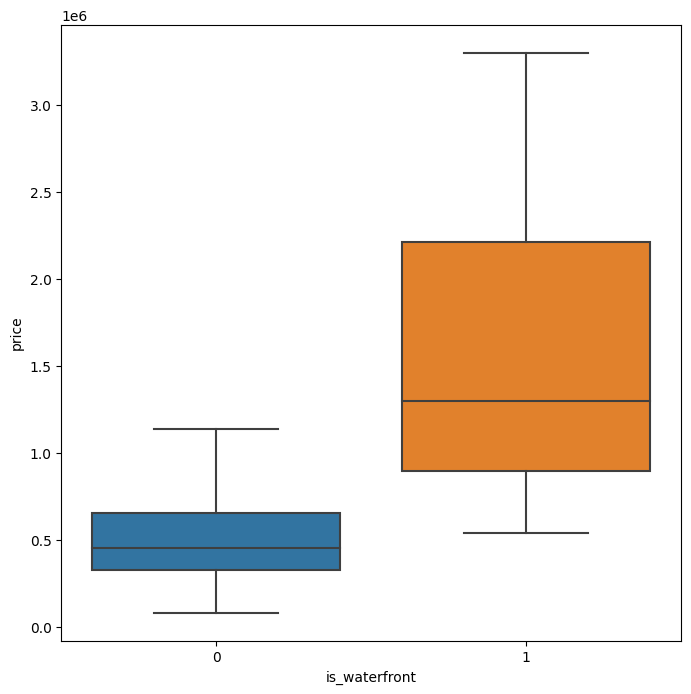

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_train_houses, x='is_waterfront', y='price', showfliers=False)
plt.show()

In [ ]:
is_waterfront_true_price = df_train_houses.loc[df_train_houses['is_waterfront']==1, ['price']]
is_waterfront_false_price = df_train_houses.loc[df_train_houses['is_waterfront']==0, ['price']]

# Teste T de Student para comparação de médias
* Hipoteses Nula (H0): Não existe diferença significativa entre as médias
* Hipoteses Alternativa (H1): Não existe diferença significativa entre as médias

* p-valor: expressa o risco de rejeitar a hipoteses nula e ela ser verdadeira
* alfa (nivel de significancia): risco máximo que estamos disposto a assumir em cometer o erro do Tipo I (rejeitar H0 e ela ser verdadeira)

Mais detalhes sobre teste T de Student:
https://www.youtube.com/watch?v=AgDC9yoopUA

In [ ]:
# Realizando o teste t de Student
stat, p = ttest_ind(is_waterfront_true_price, is_waterfront_false_price)

# Imprimindo o resultado
print('Valor de p: ', p)

# Interpretação do resultado
if p > 0.05:
    print('Não há diferença significativa entre as médias')
else:
    print('Existe diferença significativa entre as médias')

Valor de p:  [1.24482799e-37]
Existe diferença significativa entre as médias
